<a href="https://colab.research.google.com/github/mohyunyang/My_Kaggle/blob/main/Aerial_Cactus_Identification_Step1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 불러오기

In [ ]:
! pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yhyunmo","key":"8fdb7bbf0193b24d0178986819fcf478"}'}

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
! kaggle competitions download -c aerial-cactus-identification

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
 67% 8.00M/12.0M [00:00<00:00, 80.9MB/s]
100% 12.0M/12.0M [00:00<00:00, 108MB/s] 


In [ ]:
! ls

aerial-cactus-identification.zip  kaggle.json  sample_data


In [ ]:
! unzip aerial-cactus-identification.zip

Archive:  aerial-cactus-identification.zip
  inflating: sample_submission.csv   
  inflating: test.zip                
  inflating: train.csv               
  inflating: train.zip               


In [ ]:
import pandas as pd

labels = pd.read_csv('train.csv')
submission = pd.read_csv('sample_submission.csv')

In [ ]:
labels.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [ ]:
submission.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.5
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.5
2,001ee6d8564003107853118ab87df407.jpg,0.5
3,002e175c3c1e060769475f52182583d0.jpg,0.5
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.5


# 2. 데이터 시각화

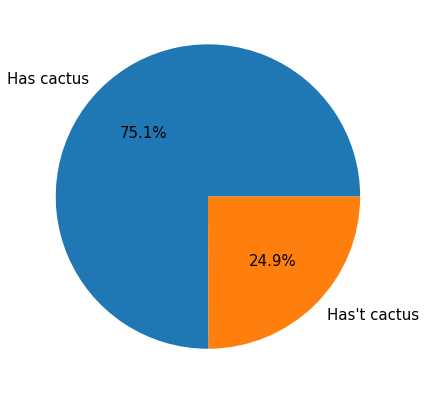

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rc('font', size = 15)
plt.figure(figsize = (7,7))
label = ['Has cactus', 'Has\'t cactus'] # 타깃값 레이블

# 타깃값 분포 파이그래프
plt.pie(labels['has_cactus'].value_counts(), labels=label, autopct='%.1f%%');

타깃 값 비율 3 대 1

> 이미지 출력

In [ ]:
from zipfile import ZipFile

# 훈련 이미지 데이터 압축 풀기
with ZipFile('train.zip') as zipper:
  zipper.extractall()

# 테스트 이미지 데이터 압축 풀기
with ZipFile('test.zip') as zipper:
  zipper.extractall()

> 데이터 개수 확인

In [ ]:
import os

num_train = len(os.listdir('train'))
num_test = len(os.listdir('test'))

print(f'훈련 데이터 개수 : {num_train}')
print(f'테스트 데이터 개수 : {num_test}')

훈련 데이터 개수 : 17500
테스트 데이터 개수 : 4000


> 이미지 출력

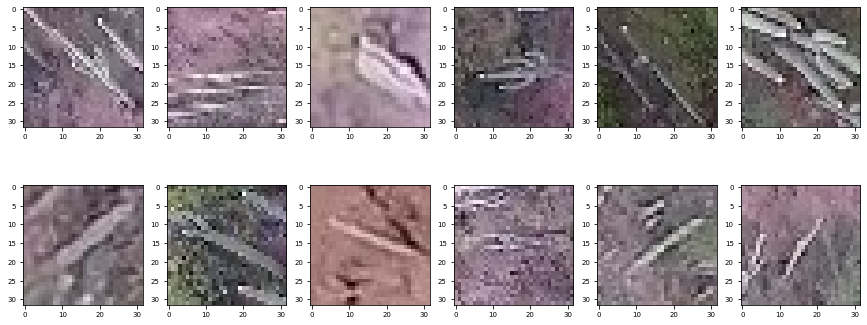

In [ ]:
import matplotlib.gridspec as gridspec
import cv2
from google.colab.patches import cv2_imshow

mpl.rc('font', size = 7)
plt.figure(figsize= (15, 6)) 
gird = gridspec.GridSpec(2,6) # 서브플롯 배치

# 선인장을 포함하는 이미지 파일명 (마지막 12개)
last_has_cactus_img_name = labels[labels['has_cactus']==1]['id'][-12:]

# 이미지 출력
for idx, img_name in enumerate(last_has_cactus_img_name):
  img_path = 'train/' + img_name
  image = cv2.imread(img_path) # 이미지 파일 읽기
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 이미지 색상 보정
  ax = plt.subplot(gird[idx])
  ax.imshow(image)

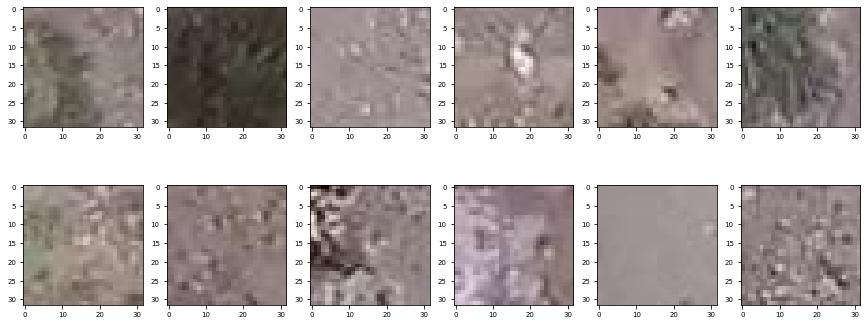

In [ ]:
plt.figure(figsize= (15, 6)) 
gird = gridspec.GridSpec(2,6) # 서브플롯 배치

# 선인장을 포함하지 않는 이미지 파일명 (마지막 12개)
last_has_cactus_img_name = labels[labels['has_cactus']==0]['id'][-12:]

# 이미지 출력
for idx, img_name in enumerate(last_has_cactus_img_name):
  img_path = 'train/' + img_name
  image = cv2.imread(img_path) # 이미지 파일 읽기
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 이미지 색상 보정
  ax = plt.subplot(gird[idx])
  ax.imshow(image)

In [ ]:
image.shape

(32, 32, 3)